<a href="https://colab.research.google.com/github/Emanuelnabarrete/Analise-Descritiva/blob/main/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.




# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [ ]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
classes = [0,1576,3940,11820,19700,200000000000]

### 2º Definir os labels das classes

In [ ]:
labels = ["E" , "D" , "C" , "B" , "A"]

### 3º Construir a coluna de frequências

In [ ]:
df_frequecia_Renda = pd.cut(x =dados.Renda , bins = classes, labels = labels , include_lowest=True)
df_frequecia_Renda = pd.DataFrame(df_frequecia_Renda)
freq = df_frequecia_Renda.value_counts()
freq

Renda
E        49755
D        18602
C         7241
B          822
A          420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [ ]:
percent = df_frequecia_Renda.value_counts(normalize=True) *100
percent

Renda
E        64.751432
D        24.208745
C         9.423477
B         1.069755
A         0.546590
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
df_frequencias = pd.DataFrame({"Frequencia" : freq, "Percentual(%)": percent})
df_frequencias = df_frequencias.sort_index(ascending=False)
df_frequencias

,Frequencia,Percentual(%)
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda'>

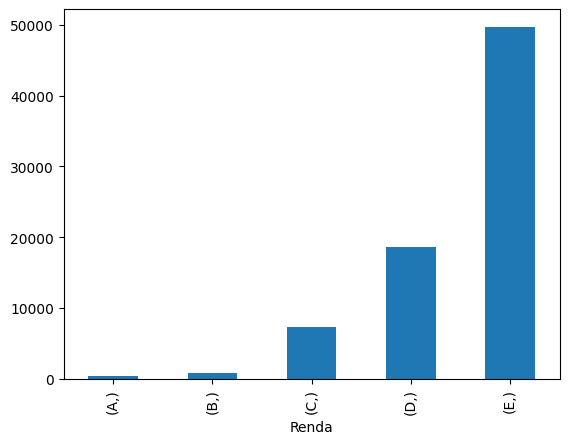

In [ ]:
df_frequencias.Frequencia.plot.bar()

> ### Conclusões

Aqui vemos que:

Mais de 64% da populacao ganha ate 2 salarios minimos;

Menos de 1% da populacao ganha ate o maximo do dataset;

E perceptivel a atividade assimetrica no grafico, sendo a direita , Muitos dados ganhando ate R$1576 e uma minima parcela ganhando R$ 19700 ate R$ 200000000000.


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

C:\Users\win\AppData\Local\Temp\ipykernel_14464\2651121990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade, kde = True)


Text(0.5, 1.0, 'Histograma - Idade')

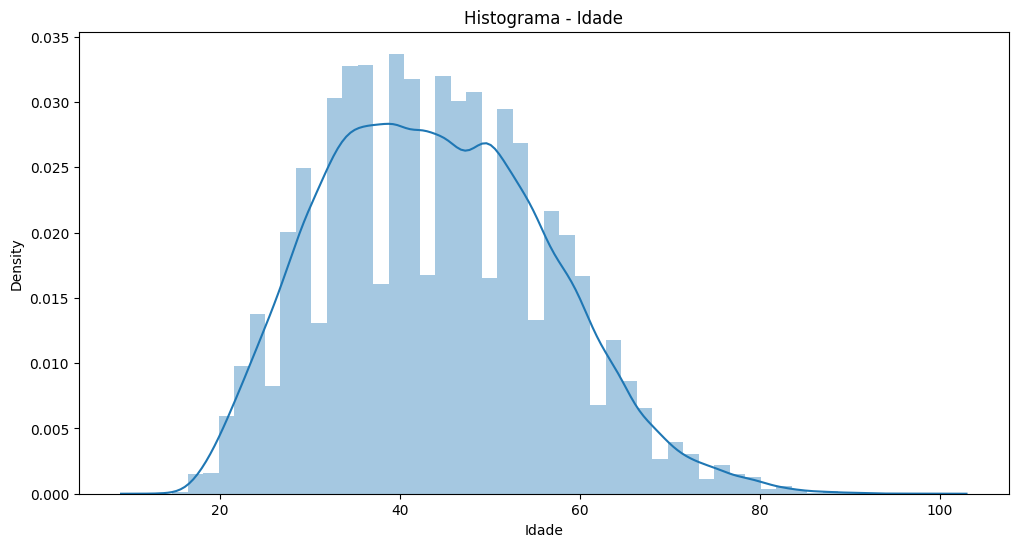

In [ ]:
ax = sns.distplot(dados.Idade, kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma - Idade")


C:\Users\win\AppData\Local\Temp\ipykernel_14464\595020686.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Renda, kde = True)


Text(0.5, 1.0, 'Histograma - Renda')

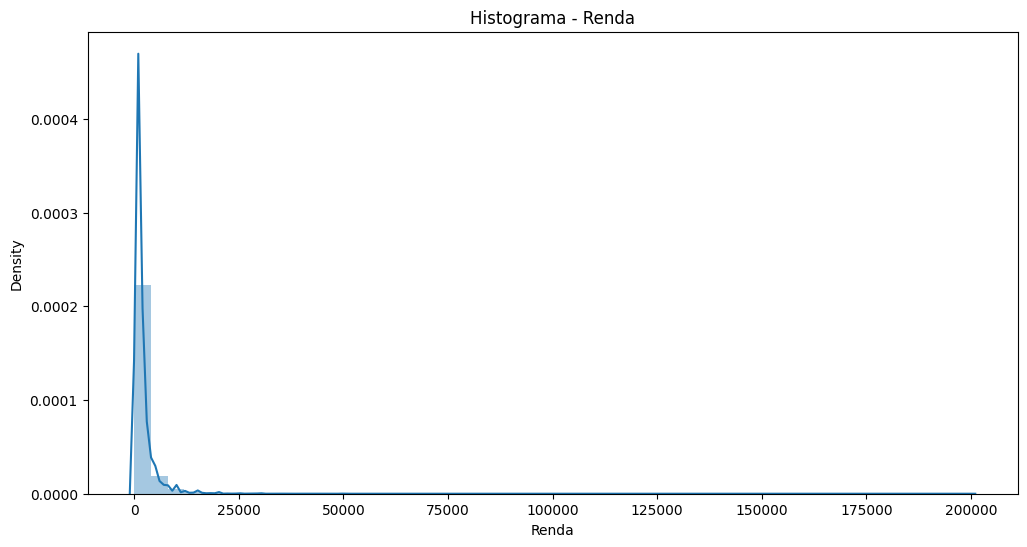

In [ ]:
ax = sns.distplot(dados.Renda, kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma - Renda")

C:\Users\win\AppData\Local\Temp\ipykernel_14464\3271352062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura, kde = False)


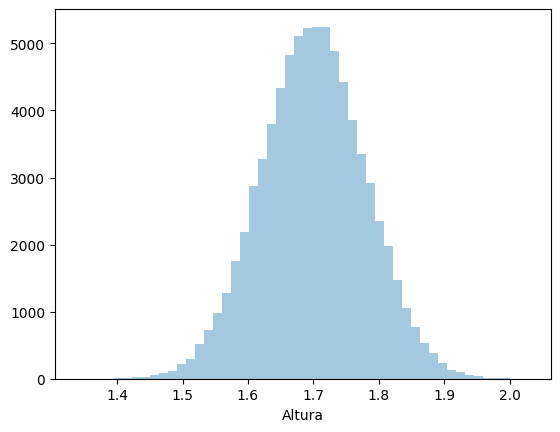

In [ ]:
ax = sns.distplot(dados.Altura, kde = False)

> ### Conclusões

Aqui vemos:
- A media da idade dos respondentes esta em torno dos 40 anos;
    - Assimetrico a direita

- A media de altura dos respondentes esta em torno dos 1.70.
    - Possivelmente Simetrico

- Existe muitos dados que recebem uma renda ate R$ 10000
    - Assimetrico a direita

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\win\AppData\Local\Temp\ipykernel_14464\1935378840.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query("Renda < 20000").Renda , kde = False)


Text(0.5, 1.0, 'Histograma de Frequencia de Renda ate R$20.000,00 ')

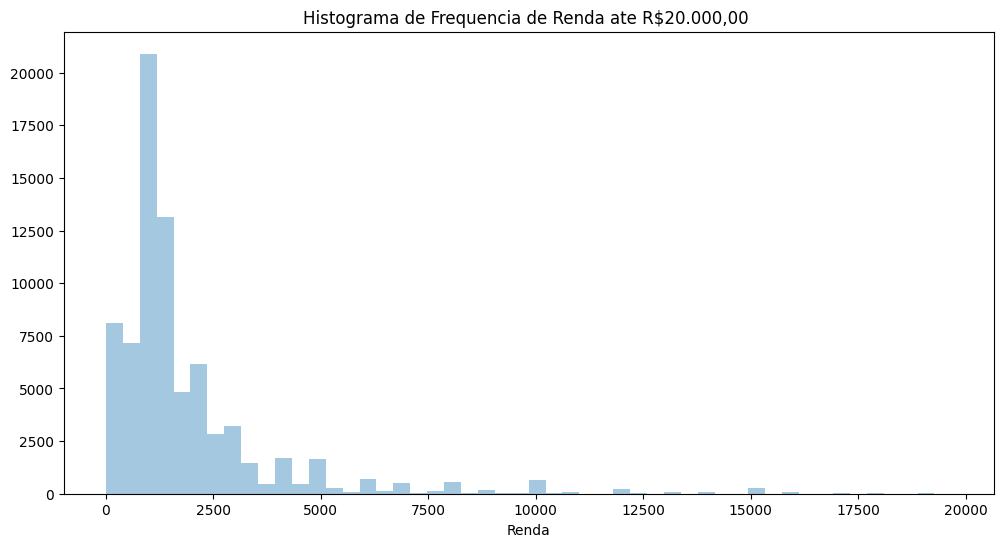

In [ ]:
ax = sns.distplot(dados.query("Renda < 20000").Renda , kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma de Frequencia de Renda ate R$20.000,00 ")


### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [ ]:
dados.UF.replace(uf, inplace=True)
dados.Sexo.replace(sexo, inplace=True)
dados.Cor.replace(cor, inplace=True)
dados["Anos de Estudo"].replace(anos_de_estudo, inplace=True)

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631


In [ ]:
df_frq_sexo = pd.crosstab(dados.Sexo,dados.Cor)
df_frq_sexo.rename(index = sexo , columns=cor, inplace=True)
df_frq_sexo


df_frq_sexo["Total"] = dados.Sexo.value_counts()
df_frq_sexo.sort_index()

Cor,Amarela,Branca,Indígena,Parda,Preta,Total
Sexo,,,,,,
Feminino,117,9621,101,10862,2889,23590
Masculino,235,22194,256,25063,5502,53250


In [ ]:
dados.shape[0]

76840

In [ ]:
df_percent_sexo = pd.crosstab(dados.Sexo, dados.Cor, normalize=True)
df_percent_sexo = df_percent_sexo *100
df_percent_sexo.rename(index = sexo , columns=cor, inplace=True)
df_percent_sexo

df_percent_sexo["Total"] = dados.Sexo.value_counts(normalize=True) *100
df_percent_sexo

Cor,Amarela,Branca,Indígena,Parda,Preta,Total
Sexo,,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761,30.700156
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333,69.299844


> ### Conclusões

Vemos aqui:
- Muitas pessoas dos sexos F e M Pardas e Brancas
- Frequencia do sexo Masculino muito evidente



## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
media = dados.Renda.mean()
media

2000.3831988547631

### Obtenha a mediana

In [ ]:
mediana = dados.Renda.median()
mediana

1200.0

### Obtenha a moda

In [ ]:
moda = dados.Renda.mode()[0]
moda

788

### Obtenha o desvio médio absoluto

In [ ]:
# Step 1 - Criando Df a partir da Renda
vlrs_renda_DMA = dados[["Renda"]]
vlrs_renda_DMA

# Step 2 - Tirando a media
media_Renda = dados.Renda.mean()


# Step 3 - Renda - media_Renda
vlrs_renda_DMA["Desvio"]  = vlrs_renda_DMA.Renda - media_Renda

vlrs_renda_DMA


# Desconsiderando Sinal Negativo

vlrs_renda_DMA["|Desvio|"] = vlrs_renda_DMA.Desvio.abs()

vlrs_renda_DMA


# Tirando DMA


Desvio_medio_absoluto = vlrs_renda_DMA["|Desvio|"].mean()



print(f" O desvio Medio Absoluto da coluna 'Renda' e igual a {Desvio_medio_absoluto}")

 O desvio Medio Absoluto da coluna 'Renda' e igual a 1526.4951371638058


C:\Users\win\AppData\Local\Temp\ipykernel_14464\2563201650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vlrs_renda_DMA["Desvio"]  = vlrs_renda_DMA.Renda - media_Renda
C:\Users\win\AppData\Local\Temp\ipykernel_14464\2563201650.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vlrs_renda_DMA["|Desvio|"] = vlrs_renda_DMA.Desvio.abs()


### Obtenha a variância

In [ ]:
Variancia = dados.Renda.var()
print(f"A Variancia da coluna 'Renda' e igual a {Variancia}")

A Variancia da coluna 'Renda' e igual a 11044906.006217021


### Obtenha o desvio-padrão

In [ ]:
Desvio_Padrao_Renda = dados.Renda.std()
print(f"O Desvio Padra da coluna 'Renda' e igual a {Desvio_Padrao_Renda}")

O Desvio Padra da coluna 'Renda' e igual a 3323.3877303464037


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
df_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor , aggfunc=["mean" , "median" , "max"] ,values=dados.Renda)
df_sexo_cor

mean                                                      \
Cor            Amarela       Branca     Indígena        Parda        Preta   
Sexo                                                                         
Feminino   3027.341880  2109.866750  2464.386139  1176.758516  1134.596400   
Masculino  4758.251064  2925.744435  1081.710938  1659.577425  1603.861687   

           median                                      max                   \
Cor       Amarela  Branca Indígena   Parda   Preta Amarela  Branca Indígena   
Sexo                                                                          
Feminino   1500.0  1200.0    788.0   800.0   800.0   20000  100000   120000   
Masculino  2800.0  1700.0    797.5  1200.0  1200.0   50000  200000    10000   

                          
Cor         Parda  Preta  
Sexo                      
Feminino    30000  23000  
Masculino  100000  50000

In [ ]:
media_todos_os_vlrs_M = df_sexo_cor.loc["Masculino"].mean()
media_todos_os_vlrs_F = df_sexo_cor.loc["Feminino"].mean()

diferenca = media_todos_os_vlrs_M - media_todos_os_vlrs_F
diferenca

8115.046390898136

> ### Conclusões

Aqui Vemos:

- As pessoas do sexo Feminino da cor Parda e Preta possuem as menores [Medias e Medianas]
- O valor Maximo  chamou a atencao por conta dos valores muito grandes

- A media total do df dividida pelo Sexo mostrou que fazendo a diferenca obteve o total de 8115.046390898136 em relacao ao sexo Feminino (Masculino - Feminino) Ou (vlr M - vlr - m). Isso mostrou que os entrevistados do sexo Masculino recebem mais independente da quantidade das pessoas no df.



### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
df_sexo_cor_MD = pd.crosstab(dados.Sexo, dados.Cor,
                             aggfunc=["var" , "std"],
                             values=dados.Renda,
                             )
df_sexo_cor_MD

var                                            \
Cor             Amarela        Branca      Indígena         Parda   
Sexo                                                                
Feminino   1.392166e+07  1.056909e+07  1.429818e+08  2.547960e+06   
Masculino  3.295707e+07  2.257002e+07  1.449841e+06  5.345747e+06   

                                std                                          \
Cor               Preta     Amarela       Branca      Indígena        Parda   
Sexo                                                                          
Feminino   1.821960e+06  3731.17366  3251.013154  11957.498292  1596.233048   
Masculino  3.749294e+06  5740.82482  4750.791872   1204.093490  2312.087184   

                        
Cor              Preta  
Sexo                    
Feminino   1349.799809  
Masculino  1936.309271

> ### Conclusões

Corrigir!!!!!!!!!


### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

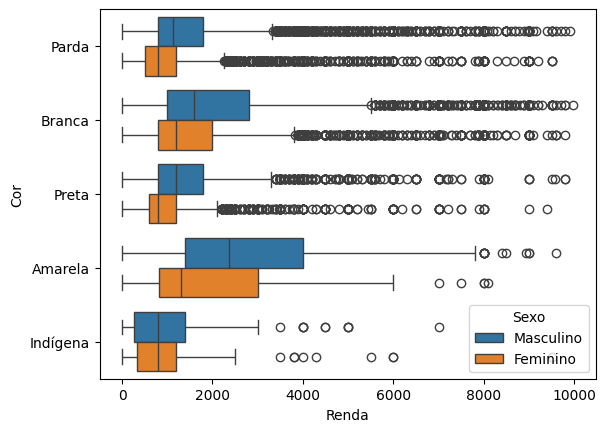

In [ ]:
ax = sns.boxplot(data = dados,
                 x =dados.query("Renda < 10000").Renda,
                 y ='Cor',
                 hue = "Sexo")

> ### Conclusões

Aqui vemos:

- Nas cores Preta, Parda e Branca existe uma grande quantidade de Outliers;
    - A cor Parda possui muitos Outliers

- A Distribuicao dos dados das pessoas Amarelas sao evidentes no grafico

- A media do boxplot das cores Indigena e Parda do sexo Feminino estao aproximadamente em R$ 788 (SM da epoca)

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

sm = stats.percentileofscore(dados.Renda,788,kind='weak')
print("{0:.2f}%".format(sm))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
dados.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
df_sexo_estudo = pd.crosstab(dados["Anos de Estudo"] , dados.Sexo , aggfunc=["mean" , "median" ,"max" , "std"] ,values= dados.Renda).round(2)
df_sexo_estudo

mean             median                max  \
Sexo                           Feminino Masculino Feminino Masculino Feminino   
Anos de Estudo                                                                  
1 ano                            492.77    895.63    400.0     788.0     2000   
10 anos                          925.92   1731.27    800.0    1218.0     6000   
11 anos                         1286.79   2117.06   1000.0    1500.0   100000   
12 anos                         1682.31   2470.33   1200.0    1800.0   120000   
13 anos                         1911.73   3195.10   1300.0    2400.0    20000   
14 anos                         2226.46   3706.62   1600.0    2500.0    20000   
15 anos ou mais                 3899.51   6134.28   2800.0    4000.0   100000   
2 anos                           529.91    931.18    450.0     788.0     4000   
3 anos                           546.85   1109.20    500.0     800.0     3500   
4 anos                           704.28   1302.33    788.0    1000.0    10000   
5 anos                           781.39   1338.65    788.0    1045.0     8000   
6 anos                           833.73   1448.88    788.0    1200.0     6000   
7 anos                           830.75   1465.50    788.0    1200.0     9000   
8 anos                           933.62   1639.40    800.0    1300.0    18000   
9 anos                           868.02   1508.04    788.0    1200.0    20000   
Não determinados                 798.17   1295.76    788.0    1200.0     3000   
Sem instrução e menos de 1 ano   516.20    799.49    390.0     700.0    10000   

                                              std            
Sexo                           Masculino Feminino Masculino  
Anos de Estudo                                               
1 ano                              30000   425.29   1331.95  
10 anos                            45000   620.61   2078.61  
11 anos                           200000  1819.04   2676.54  
12 anos                            30000  4851.83   2268.08  
13 anos                            25000  2053.79   2797.12  
14 anos                            50000  2064.08   3987.21  
15 anos ou mais                   200000  4212.77   7447.61  
2 anos                             40000   498.23   1435.17  
3 anos                             80000   424.12   2143.80  
4 anos                             50000   629.55   1419.82  
5 anos                             35000   635.78   1484.65  
6 anos                             25000   574.55   1476.63  
7 anos                             40000   602.04   1419.71  
8 anos                             30000   896.78   1515.58  
9 anos                             60000   973.22   2137.66  
Não determinados                    7000   459.99    979.65  
Sem instrução e menos de 1 ano     30000   639.31   1023.90

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
dados["Anos de Estudo"].value_counts()

Anos de Estudo
11 anos                           20848
15 anos ou mais                   10795
8 anos                             7980
4 anos                             6729
Sem instrução e menos de 1 ano     5849
5 anos                             4499
3 anos                             2891
7 anos                             2689
6 anos                             2445
10 anos                            2118
2 anos                             2101
9 anos                             1840
12 anos                            1836
14 anos                            1388
1 ano                              1388
13 anos                            1253
Não determinados                    191
Name: count, dtype: int64

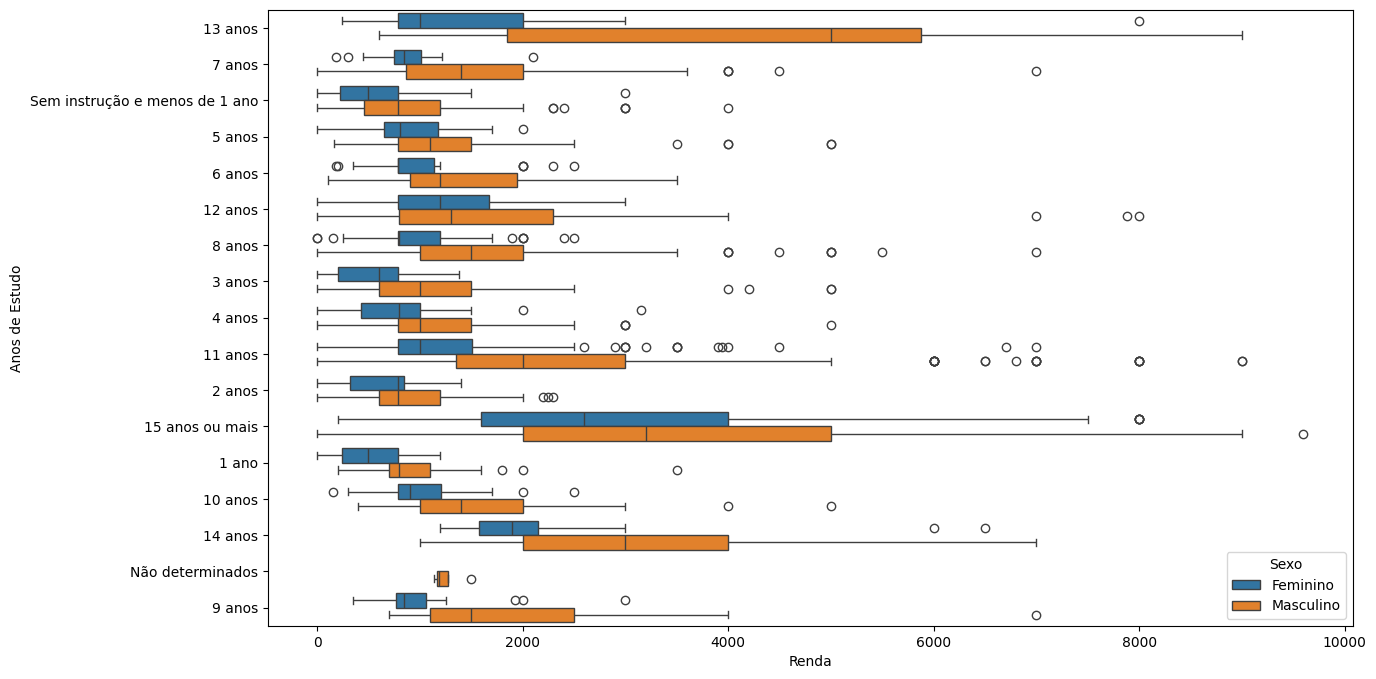

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dados.query('Renda < 10000 and Idade == 50'), orient='h')
ax.figure.set_size_inches(14,8)



> ### Conclusões

No geral, vemos que independente do ano des estudo e a Idade, os Homens possuem uma distribuicao maior da renda em comparacao as mulheres


- Media Idade = 44
    - 'Nao Determinado' - a distribuicao e tao minima que mal aparece
    - A media max para as Mulheres esta em torno dos R$ 3022      
    - A media max para os Homens esta em torno dos R$3632
        
- Moda Idade = 40
    - Aqui vemos uma distribuicao maior em comparacao a Idade Media para os Homens, ja para as Mulheres ocorreu uma diminuicao do IIQ (Retrocedeu para menos de R$2000)
    - A media max para as Mulheres esta em torno dos R$ 2735 - Variacao Percentual -> -9%              
    -A media max para os Homens esta em torno dos R$ 4065 - Variacao Percentual -> 11.92%

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
dados.query("Renda <10000").groupby("UF").Renda.agg(["mean" , "median" , "max" , "std"])

,mean,median,max,std
UF,,,,
Acre,1334.760776,890.0,9000,1333.508666
Alagoas,1113.923333,788.0,9000,1119.804362
Amapá,1669.787276,1200.0,8500,1408.004816
Amazonas,1332.383066,900.0,9000,1296.287205
Bahia,1200.026050,800.0,9200,1224.696387
Ceará,1132.800781,788.0,9500,1232.638420
Distrito Federal,2684.910744,1800.0,9900,2210.633909
Espírito Santo,1672.142566,1200.0,9000,1373.623133
Goiás,1786.121602,1426.0,9000,1376.136695


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

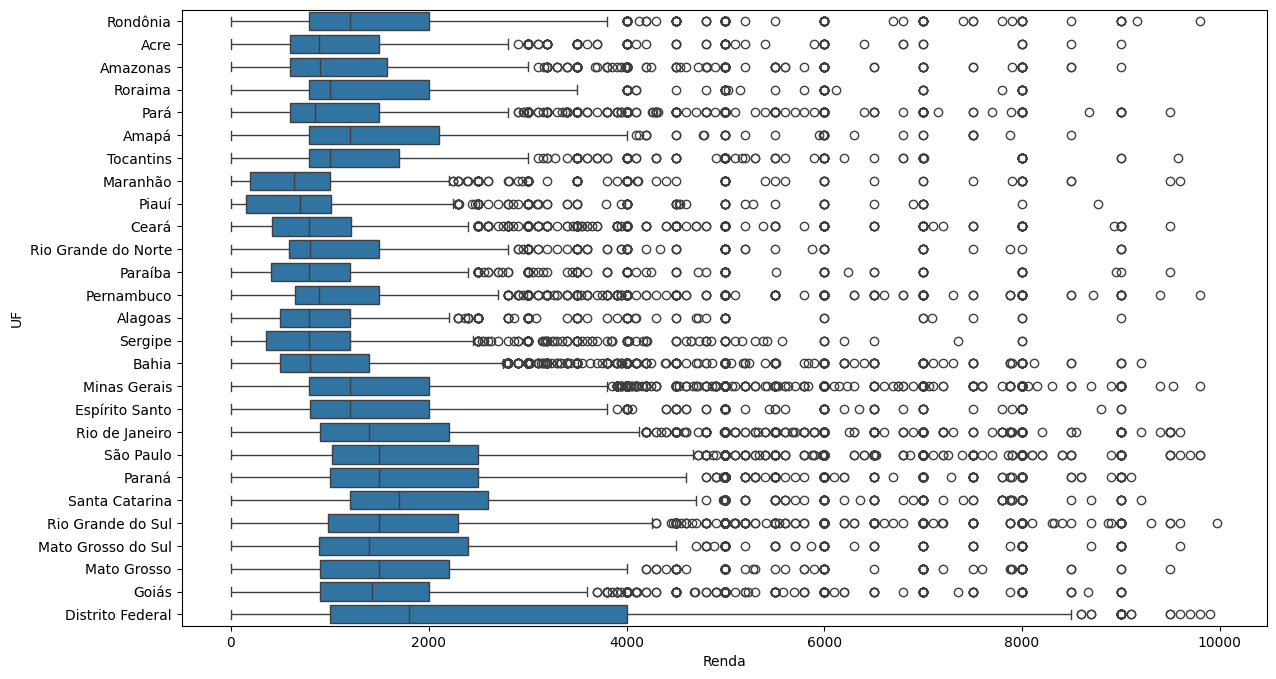

In [ ]:
ax = sns.boxplot(x = "Renda" , y ="UF",data = dados.query("Renda < 10000"), orient= "h")
ax.figure.set_size_inches(14,8)

> ### Conclusões

Aqui vemos que ->
 - O Desvio Padrao esta muito elevado no Destrito Federal;

 -  De todos os Estados, 50% ganham ate R$95000 pelo vlr Max



   



## Estudando Renda entre 55000 e 200000

In [ ]:
df_renda = dados.query("Renda >= 55000 and Renda <= 2000000")

In [ ]:
df_renda

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
11454,Tocantins,Masculino,51,Parda,15 anos ou mais,60000,1.765643
28110,Bahia,Masculino,51,Branca,11 anos,200000,1.587794
32379,Minas Gerais,Masculino,46,Parda,15 anos ou mais,100000,1.724601
37497,Minas Gerais,Masculino,72,Branca,15 anos ou mais,100000,1.641713
37612,Minas Gerais,Masculino,61,Branca,15 anos ou mais,100000,1.580114
38680,Minas Gerais,Masculino,79,Branca,9 anos,60000,1.644753
39231,Minas Gerais,Masculino,40,Branca,15 anos ou mais,57000,1.742436
40934,Espírito Santo,Feminino,71,Branca,15 anos ou mais,100000,1.793337
41202,Rio de Janeiro,Masculino,58,Parda,15 anos ou mais,90000,1.717068
43679,Rio de Janeiro,Feminino,65,Branca,11 anos,100000,1.773411


### Idade do DataSet

#### Tendencia Central Idade

In [ ]:
df_renda.Idade.mean() # Idade Media

57.31818181818182

In [ ]:
df_renda.Idade.median() # Mediana da Idade

55.5

In [ ]:
df_renda.Idade.mode()# Moda da Idade

0    39
1    40
2    51
3    53
4    58
5    72
6    79
Name: Idade, dtype: int64

#### Frequencia Idade

In [ ]:
percent_Idade = df_renda.Idade.value_counts(normalize=True) * 100
freq_Idade = df_renda.Idade.value_counts()

df_sexo_rendas = pd.DataFrame({"Frequencia" : freq_Idade, "Percentual(%)": percent_Idade}).sort_index()
df_sexo_rendas

,Frequencia,Percentual(%)
Idade,,
39,2,9.090909
40,2,9.090909
42,1,4.545455
43,1,4.545455
46,1,4.545455
51,2,9.090909
53,2,9.090909
58,2,9.090909
61,1,4.545455


### Estados do Dataset

In [ ]:
percent_UF = df_renda.UF.value_counts(normalize=True) * 100
freq_UF = df_renda.UF.value_counts()

df_sexo_UF = pd.DataFrame({"Frequencia" : freq_UF, "Percentual(%)": percent_UF}).sort_values(by ="Frequencia")
df_sexo_UF

,Frequencia,Percentual(%)
UF,,
Tocantins,1,4.545455
Bahia,1,4.545455
Espírito Santo,1,4.545455
Paraná,1,4.545455
Santa Catarina,1,4.545455
Distrito Federal,1,4.545455
São Paulo,3,13.636364
Minas Gerais,5,22.727273
Rio de Janeiro,8,36.363636


### Sexo do Dataset

In [ ]:
percent_sexo = df_renda.Sexo.value_counts(normalize=True) * 100
freq_sexo = df_renda.Sexo.value_counts()

df_sexo_rendas = pd.DataFrame({"Frequencia" : freq_sexo, "Percentual(%)": percent_sexo}).sort_values(by = "Frequencia")
df_sexo_rendas

,Frequencia,Percentual(%)
Sexo,,
Feminino,4,18.181818
Masculino,18,81.818182


### Renda do Dataset

In [ ]:
freq_Renda = df_renda.Renda.value_counts()

percent_Renda = df_renda.Renda.value_counts(normalize=True)*100

df_Renda_rendas = pd.DataFrame({"Frequencia" : freq_Renda, "Percentual(%)": percent_Renda}).sort_values(by = "Frequencia")


df_Renda_rendas

,Frequencia,Percentual(%)
Renda,,
57000,1,4.545455
90000,1,4.545455
120000,1,4.545455
58000,1,4.545455
200000,3,13.636364
80000,4,18.181818
60000,5,22.727273
100000,6,27.272727


#### Tendencia Central Renda

In [ ]:
df_renda.Renda.mean()

97500.0

In [ ]:
df_renda.Renda.mode()

0    100000
Name: Renda, dtype: int64

In [ ]:
df_renda.Renda.median()

85000.0

### Graficos

C:\Users\win\AppData\Local\Temp\ipykernel_14464\88304527.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_renda.Renda, kde = False, bins = 10)  # Frequencia de Renda


Text(0.5, 1.0, 'Frequencia')

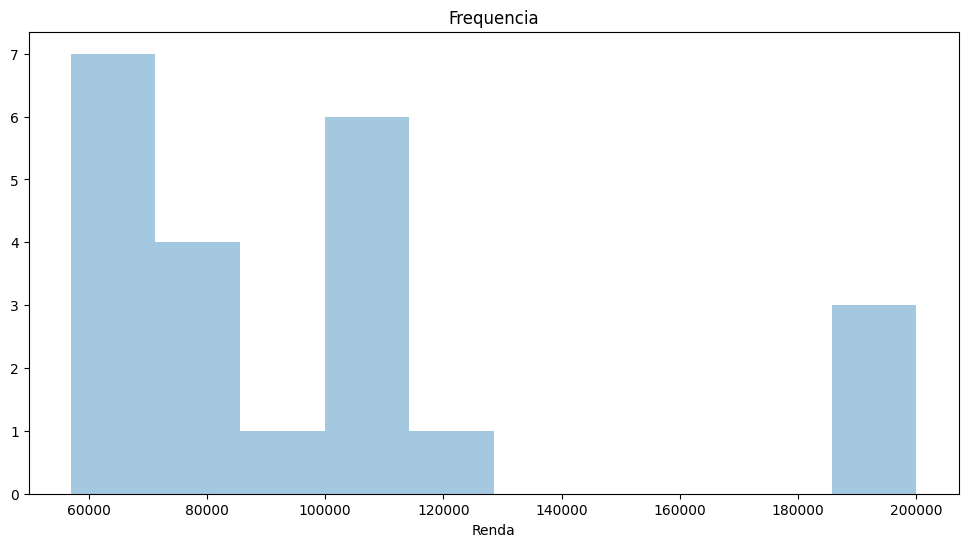

In [ ]:
ax = sns.distplot(df_renda.Renda, kde = False, bins = 10)  # Frequencia de Renda
ax.figure.set_size_inches(12,6)
ax.set_xlabel("Renda")
ax.set_title("Frequencia")




C:\Users\win\AppData\Local\Temp\ipykernel_14464\2876187532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_renda.Idade, kde = False, bins = 7) # Freuqncia Idade


Text(0.5, 1.0, 'Frequencia')

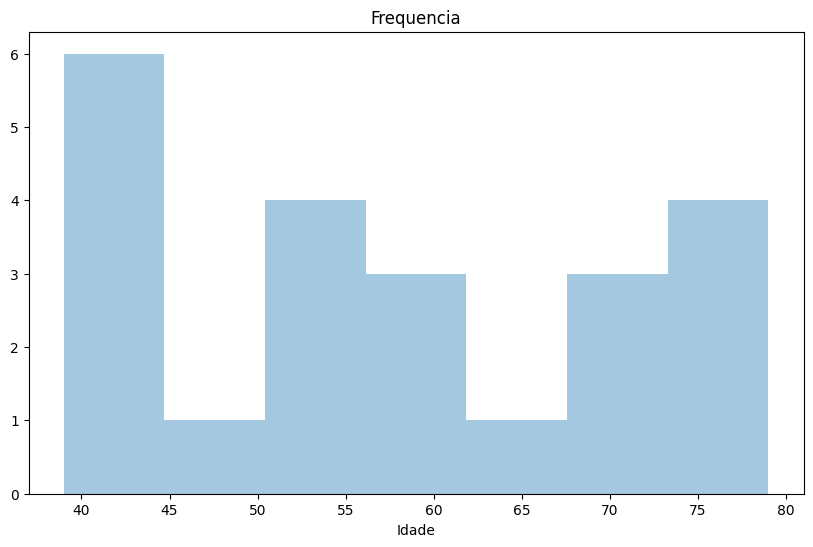

In [ ]:
ax = sns.distplot(df_renda.Idade, kde = False, bins = 7) # Freuqncia Idade
ax.figure.set_size_inches(10,6)
ax.set_xlabel("Idade")
ax.set_title("Frequencia")

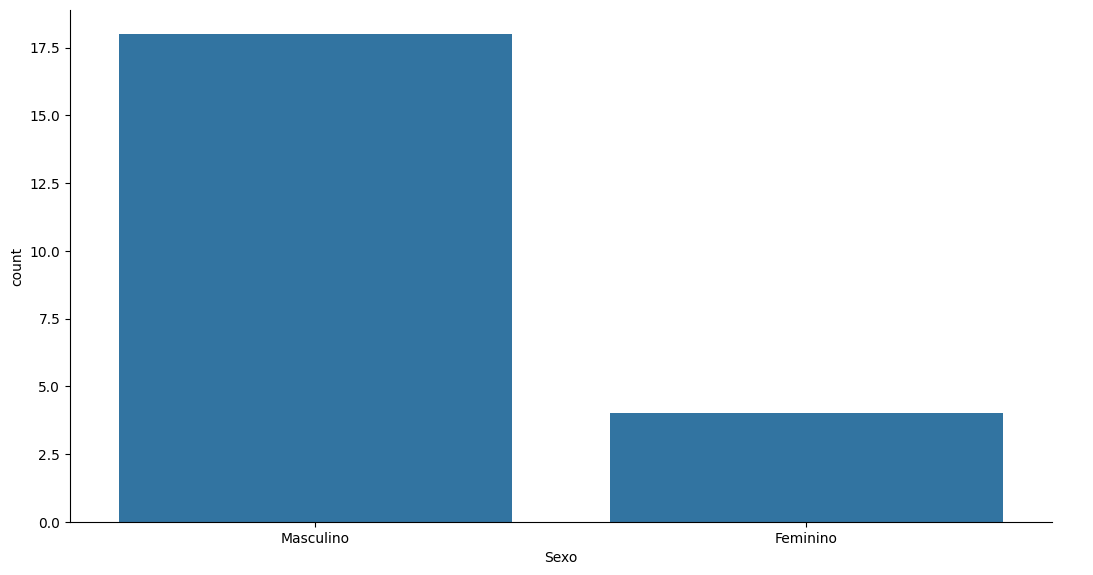

In [ ]:
ax = sns.catplot(data = df_renda, x = "Sexo" , kind = "count") # Frequencia de Sexo
ax.figure.set_size_inches(12,6)

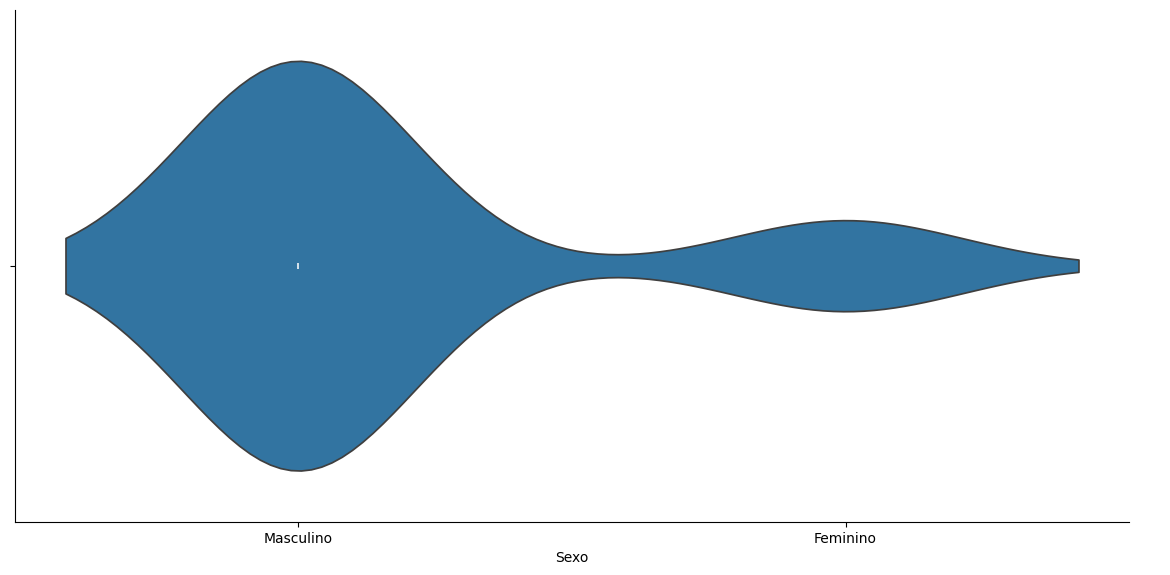

In [ ]:
ax = sns.catplot(data = df_renda, x = "Sexo" , kind = "violin")
ax.figure.set_size_inches(12,6)


In [ ]:
df_renda.Sexo.value_counts()

Sexo
Masculino    18
Feminino      4
Name: count, dtype: int64

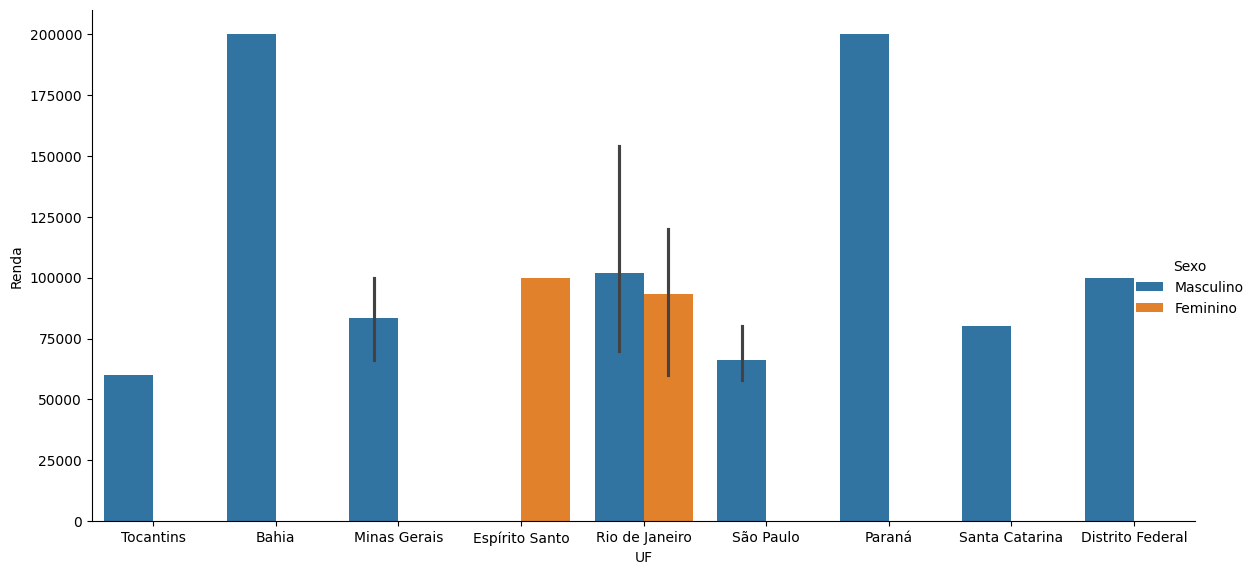

In [ ]:
ax = sns.catplot(data = df_renda, x = "UF", y = "Renda",hue = "Sexo", kind = "bar", aspect= 6) # Histograma de Renda por Estado filtrado por sexo
ax.figure.set_size_inches(12,6)


Text(0.5, 1.0, 'Boxplot')

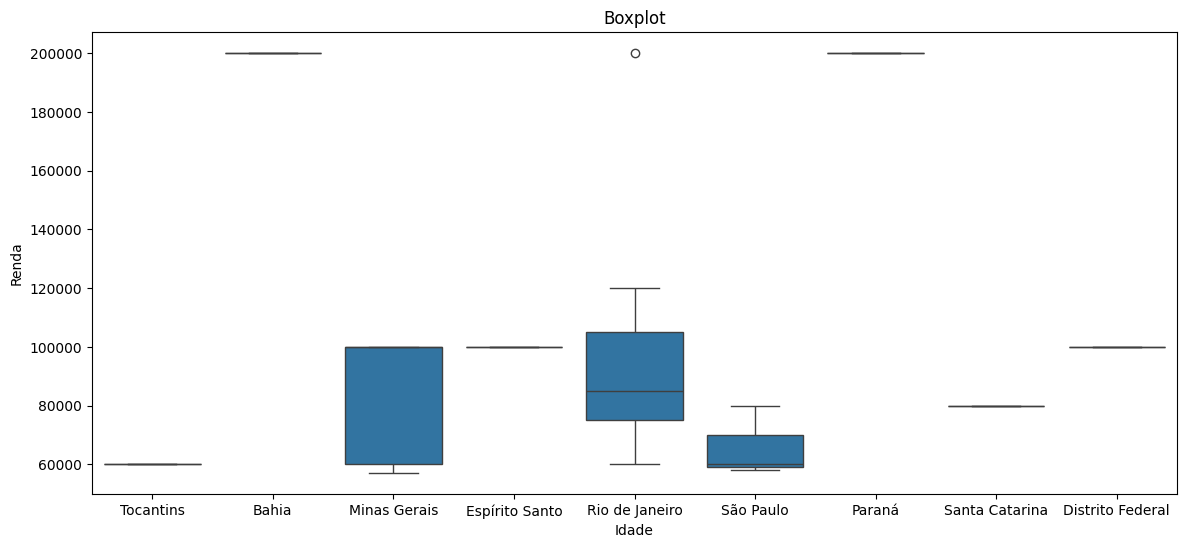

In [ ]:
ax = sns.boxplot(data = df_renda,x ="UF", y ="Renda") # Boxplot da Renda por Estado (UF)
ax.figure.set_size_inches(14,6)
ax.set_xlabel("Idade")
ax.set_title("Boxplot UF")